<a href="https://colab.research.google.com/github/troncosofranco/IoT-Spark/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import Modules

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6

#2. Load Data


In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.shape
df.head()
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#3. Explore data

Target label contains only two classes, normal and fraud (anomaly).

In [4]:
anomalies = df[df.Class == 1]
normal = df[df.Class == 0]

print(f'Anomalies: {anomalies.shape}')
print(f"Normal: {normal.shape}")

Anomalies: (492, 31)
Normal: (284315, 31)


The dataset is unbalanced. Data is overwhelmingly biased towards 
normal data, where anomalies only comprise a vast minority of data 
points.

Plot the class labels

Text(0, 0.5, 'Counts')

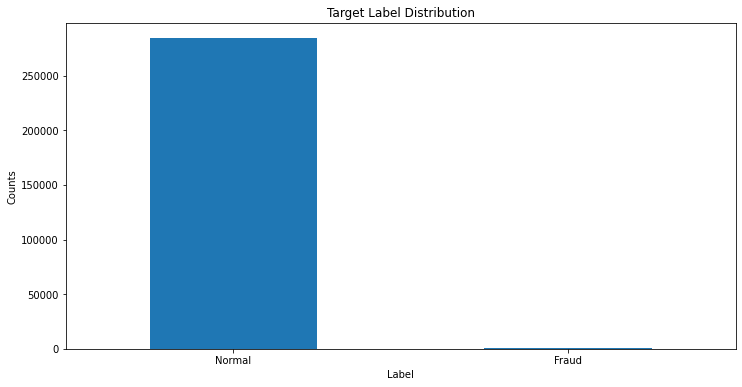

In [5]:
classes = pd.value_counts(df.Class, sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Target Label Distribution")
plt.xticks(range(2), ["Normal", "Fraud"])
plt.xlabel("Label")
plt.ylabel("Counts")

Explore each class label

In [6]:
anomalies.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Fraud data is skewed right, with low transaction values. Most of fraud transactions are less than $100. Anomalies does not occure with high-value transaction.

In [7]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Normal data is skewed right. Most of the transactions show a transaction value lower than 100. Some transactions show high values around 25,000.

Scatter plot of class distribution

In [8]:
# Histogram Plot
def plot_histogram(df, bins, column, log_scale=False):
 anomalies = df[df.Class == 1]
 normal = df[df.Class == 0]
 fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
 fig.suptitle(f'Counts of {column} by Class')
 ax1.hist(anomalies[column], bins = bins, color="red")
 ax1.set_title('Fraud')
 ax2.hist(normal[column], bins = bins, color="orange")
 ax2.set_title('Normal')
 plt.xlabel(f'{column}')
 plt.ylabel('Count')
 if log_scale:
  plt.yscale('log')
  plt.xlim((np.min(df[column]), np.max(df[column])))
  plt.show()

In [9]:
# scatter plot
def plot_scatter(df, x_col, y_col, sharey = False):
 anomalies = df[df.Class == 1]
 normal = df[df.Class == 0]
 fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=sharey)
 fig.suptitle(f'{y_col} over {x_col} by Class')
 ax1.scatter(anomalies[x_col], anomalies[y_col], color='red')
 ax1.set_title('Anomaly')
 ax2.scatter(normal[x_col], normal[y_col], color='orange')
 ax2.set_title('Normal')
 plt.xlabel(x_col)
 plt.ylabel(y_col)
 plt.show()

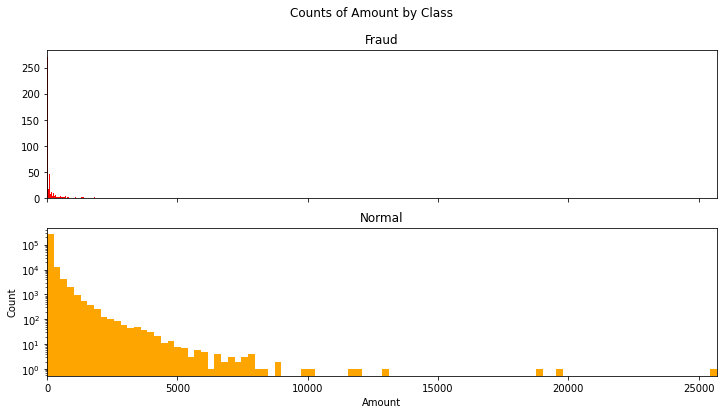

In [10]:
bins = 100
plot_histogram(df, bins, "Amount", log_scale=True)

The previous plots show that both classes exhibit a right skew, as well as the presence of outliers in the normal data.

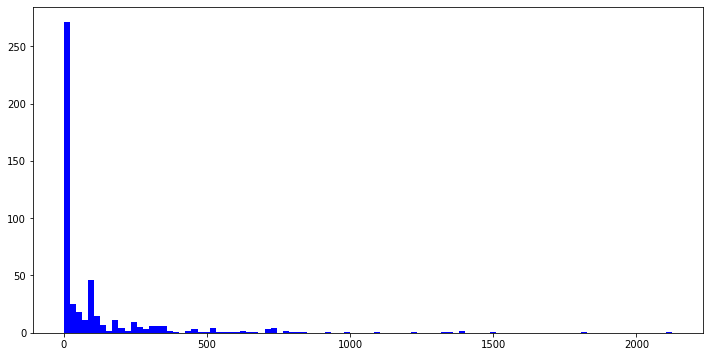

In [11]:
plt.hist(anomalies.Amount, bins = bins, color="blue")
plt.show()

The fraud transactions are right skewed. This confirms that the majority of anomalous occurs with low transaction amounts.

Anomaly transaction distribution over time.

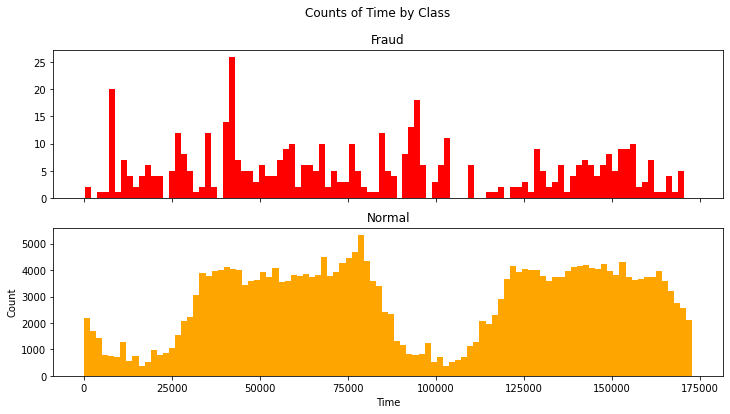

In [12]:
plot_histogram(df, bins, "Time")

Fraudulent transactions occur throughout the entire timeline, without no particular peak time. Regarding normal data, normal transactions occur in "waves". A portion of the fraudulent transactions still occur where normal transactions are at a maximum.

Anomaly transaction distribution over features.

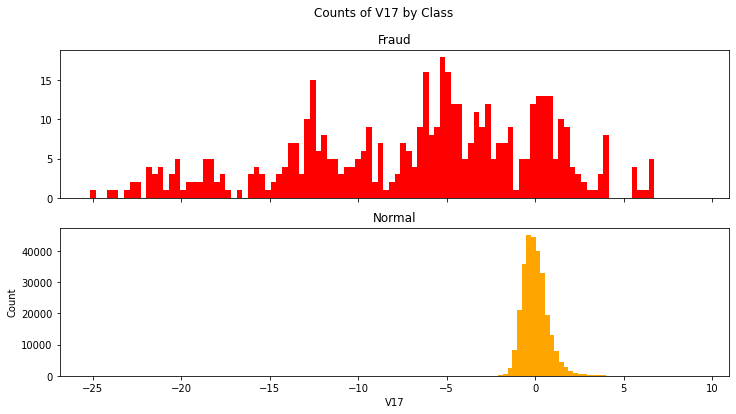

In [13]:
plot_histogram(df, bins, "V17")

V17 feature differentiate between normal and 
fraudulent points considering the transaction amounts.

#3. Build Model
##3.1. Scikit-Learn

In [14]:
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix
from sklearn.model_selection import KFold

Data is unbalanced. Different dataframes are obtained (50% sample of normal data). random_state to specifies the reproducibility of the random sampling.

---



In [15]:
normal = df[df['Class'] == 0].sample(frac=0.5, random_state=2020).reset_index(drop=True)
anomaly = df[df['Class'] == 1]

Size of both datasets.

In [16]:
print(f"Normal Size: {normal.shape}")
print(f"Anomaly Size: {anomaly.shape}")

Normal Size: (142158, 31)
Anomaly Size: (492, 31)


There is still a hugh disparity between normal and anomaly dataframes. Logistic regression is able to  distinguish between both classes. This is no the case of neural networks.

Split dataset

In [17]:
normal_train, normal_test = train_test_split(normal, test_size = 0.2, random_state = 2020)
anomaly_train, anomaly_test = train_test_split(anomaly, test_size = 0.2, random_state = 2020)

In [18]:
normal_train, normal_validate = train_test_split(normal_train, test_size = 0.25, random_state = 2020)
anomaly_train, anomaly_validate = train_test_split(anomaly_train, test_size = 0.25, random_state = 2020)

In [19]:
x_train = pd.concat((normal_train, anomaly_train))
x_test = pd.concat((normal_test, anomaly_test))
x_validate = pd.concat((normal_validate, anomaly_validate))

y_train = np.array(x_train["Class"])
y_test = np.array(x_test["Class"])
y_validate = np.array(x_validate["Class"])

In [20]:
x_train = x_train.drop("Class", axis=1)
x_test = x_test.drop("Class", axis=1)
x_validate = x_validate.drop("Class", axis=1)

Shape of datasets.

In [21]:
print("Training sets:\nx_train: {} y_train: {}".format(x_train.
shape, y_train.shape))
print("\nTesting sets:\nx_test: {} y_test: {}".format(x_test.
shape, y_test.shape))
print("\nValidation sets:\nx_validate: {} y_validate:{}".format(x_validate.shape, y_validate.shape))

Training sets:
x_train: (85588, 30) y_train: (85588,)

Testing sets:
x_test: (28531, 30) y_test: (28531,)

Validation sets:
x_validate: (28531, 30) y_validate:(28531,)


When some features have significant different values range the model will have a much harder time learning. On other words,  the model will require many more steps to converge. For this reason, it is better scale down by normalizing the data.

Scale data

In [22]:
scaler = StandardScaler()
scaler.fit(pd.concat((normal, anomaly)).drop("Class", axis=1))
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_validate = scaler.transform(x_validate)

Logistic Regression Model

In [23]:
sk_model = (LogisticRegression(random_state=None, max_iter= 410, solver='newton-cg')
            .fit(x_train, y_train))

Evaluate the model using accuracy and AUC (Area Under Curve) score. The ideal AUC score is 1. An AUC score of 0.5 means that the model is practically just guessing randomly.

In [24]:
eval_acc = sk_model.score(x_test, y_test)
preds = sk_model.predict(x_test)
auc_score = roc_auc_score(y_test, preds)

In [25]:
print(f"AUC Score: {auc_score:.2%}")
print(f"Accuracy Score: {eval_acc:.2%}")


AUC Score: 84.33%
Accuracy Score: 99.87%


AUC and accuracy score are high. The last one is influenced by the high proportion of normal points. According to the AUC score, the model distinguishes between both classes.

Plot ROC curve.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


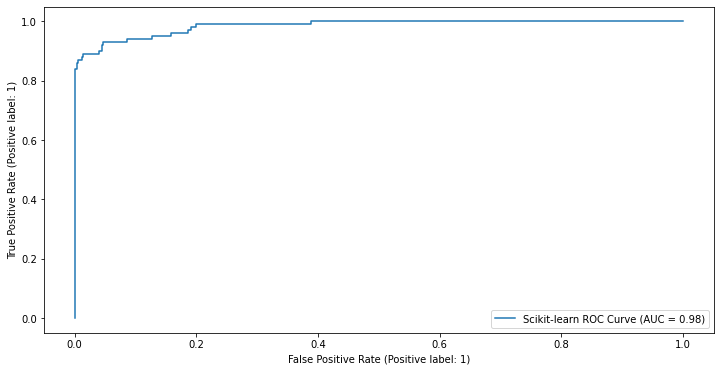

In [26]:
roc_plot = plot_roc_curve(sk_model, x_test, y_test, name='Scikit-learn ROC Curve')

Plot confusion matrix.

• True positives are values that the model predicts as positive that actually are positive.

• False negatives are values that the model predicts as negative that actually are positive.

• False positives are values that the model predicts as positive that actually are negative.

• True negatives are values that the model predicts as negative that actually are negative.

Text(0.5, 33.0, 'Predicted')

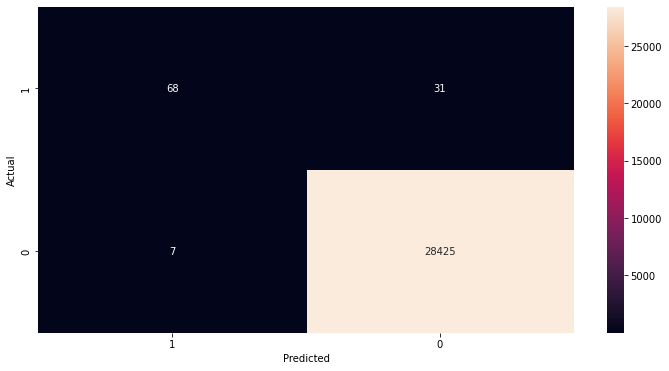

In [27]:
conf_matrix = confusion_matrix(y_test, preds)
ax = sns.heatmap(conf_matrix, annot=True,fmt='g')
ax.invert_xaxis()
ax.invert_yaxis()
plt.ylabel('Actual')
plt.xlabel('Predicted')

The confusion matrix provides a suitable representation of the model performance. The model can predict the majority of anomalies correctly.

## 3.2. Model validation

K-fold cross-validation to compare several hyperparameter values. The hyperparameter to be tuned in this case are the anomaly weights compated with the normal data points.

In [28]:
# List of weigths to iterate
anomaly_weights = [1, 5, 10, 15] 

In [29]:
# Define number of folds
num_folds = 5

# Initialize data fold generator
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=2020)

KFold() function splits the data into num_folds different partitions. A single fold acts as a validation set at a time, while the rest of the folds are used for training. Thus, validation contributes to understand how the model is fitting new data.

In [30]:
# Define validation script
logs = []

for f in range(len(anomaly_weights)):
    fold = 1
    accuracies = []
    auc_scores= []
    for train, test in kfold.split(x_validate, y_validate):
        weight = anomaly_weights[f]
        class_weights= {0:1, 1: weight}
        sk_model = LogisticRegression(random_state=None, max_iter=400, solver='newton-cg', class_weight=class_weights).fit(x_validate[train], y_validate[train])
    
        for h in range(40): print('-', end="")
        print(f"\nfold {fold}\nAnomaly Weight: {weight}")
        eval_acc = sk_model.score(x_validate[test], y_validate[test])
        preds = sk_model.predict(x_validate[test])
  
        try:
            auc_score = roc_auc_score(y_validate[test], preds)
        except:
            auc_score = -1
      
        print("AUC: {}\neval_acc: {}".format(auc_score, eval_acc))
      
        accuracies.append(eval_acc)
        auc_scores.append(auc_score)
      
        log = [sk_model, x_validate[test], y_validate[test], preds]
        logs.append(log)
      
        fold = fold + 1

    print("\nAverages: ")
    print("Accuracy: ", np.mean(accuracies))
    print("AUC: ", np.mean(auc_scores))
    print("Best: ")
    print("Accuracy: ", np.max(accuracies))
    print("AUC: ", np.max(auc_scores))

----------------------------------------
fold 1
Anomaly Weight: 1
AUC: 0.8
eval_acc: 0.9985982127212195
----------------------------------------
fold 2
Anomaly Weight: 1
AUC: 0.8568790049001132
eval_acc: 0.998422712933754
----------------------------------------
fold 3
Anomaly Weight: 1
AUC: 0.8179179195189047
eval_acc: 0.9980722046968104
----------------------------------------
fold 4
Anomaly Weight: 1
AUC: 0.8682452129973255
eval_acc: 0.9987732211706976
----------------------------------------
fold 5
Anomaly Weight: 1
AUC: 0.8528532875621686
eval_acc: 0.9989484752891693

Averages: 
Accuracy:  0.9985629653623302
AUC:  0.8391790849957024
Best: 
Accuracy:  0.9989484752891693
AUC:  0.8682452129973255
----------------------------------------
fold 1
Anomaly Weight: 5
AUC: 0.8748241603657465
eval_acc: 0.9987734361310671
----------------------------------------
fold 2
Anomaly Weight: 5
AUC: 0.9515893956527202
eval_acc: 0.9980722046968104
----------------------------------------
fold 3
Anomal

The best metrics were obtained for anomaly weight = 10 and 3 folds.

With index 10, it begins the first fold in logs with weight ten, so the second fold is at index 11.

In [39]:
sk_model, x_val, y_val, preds = logs[11]

Plot ROC curve with anomaly weight tunning.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


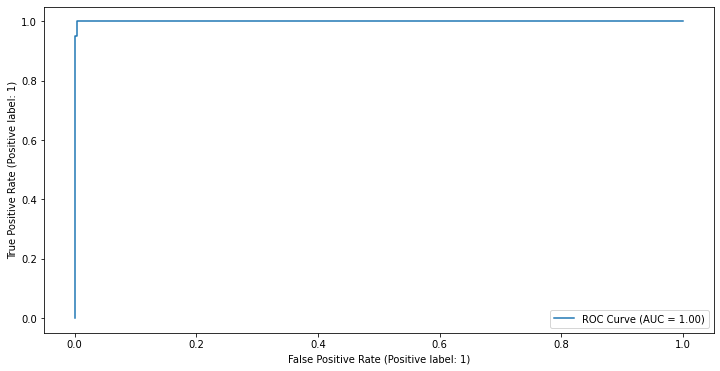

In [40]:
roc_plot = plot_roc_curve(sk_model, x_val, y_val, name='ROC Curve')

The ROC curve for the specific validation fold .  Thusm it would mean the AUC would be as close to 1.0.

Plot the confusion matrix with anomaly weight tunning.

Text(0.5, 33.0, 'Predicted')

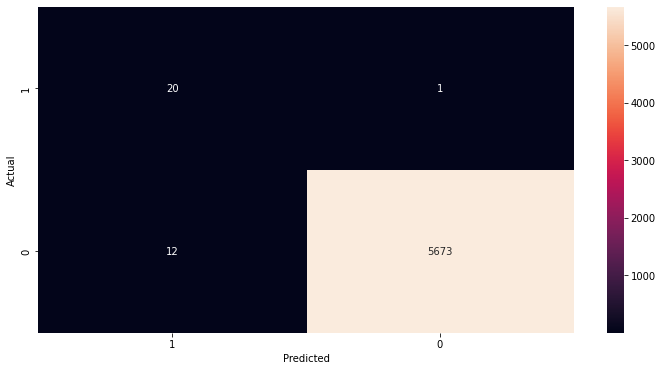

In [41]:
conf_matrix = confusion_matrix(y_val, preds)
ax = sns.heatmap(conf_matrix, annot=True,fmt='g')
ax.invert_xaxis()
ax.invert_yaxis()
plt.ylabel('Actual')
plt.xlabel('Predicted')

The confusion matrix for a specific validation fold show very good accuracy in labeling normal data points and does very well with anomaly points. Furthermore, it can be observed that can see that there are barely any anomalies in this validation fold. The model exhibited better performance in anomaly detection having a higher weight in this class.

#3.2. Pyspark


Import the modules.

In [34]:
!pip install pyspark
import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext
from pyspark.sql.types import *
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression as LogisticRegressionPySpark
import pyspark.sql.functions as F
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Define spark context.

In [35]:
os.environ["SPARK_LOCAL_IP"]='127.0.0.1'
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.sparkContext._conf.getAll()


[('spark.app.startTime', '1673011220778'),
 ('spark.driver.extraJavaOptions',
  '-XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED'),
 ('spark.executor.id', 'driver'),
 ('spark.driver.host', 'localhost'),
 ('spark.app.id', 'local-1673011222437'),
 ('spark.app.name', 'pyspark-shell'),
 ('spark.driver.port', '33583'),
 ('spa

Load data

In [36]:
df = spark.read.csv('creditcard.csv', header = True, inferSchema = True)


Remove the Class column from the list of columns. Class column must not be included in the feature 
vector.

In [37]:
labelColumn = "Class"
cols = df.columns
numericCols = cols
numericCols.remove(labelColumn)
print(numericCols)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [38]:
df.show(2)

+----+----------------+-------------------+----------------+-----------------+------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+-----------------+------------------+--------------------+-------------------+------+-----+
|Time|              V1|                 V2|              V3|               V4|                V5|                 V6|                 V7|                V8|                V9|               V10|               V11|               V12|               V13|               V14|              V15|               V16|               V17|               V18|               V19|                V20|               V21|               V22|               V23|       

Pyspark dataframe to Pandas.

In [42]:
df.toPandas().head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


To Train the model in Pyspark is required to pass the features in a vector.

In [43]:
stages = []
assemblerInputs = numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, 
outputCol="features")
stages += [assembler]
dfFeatures = df.select(F.col(labelColumn).alias('label'), *numericCols )

In [44]:
dfFeatures.show(2)

+-----+----+----------------+-------------------+----------------+-----------------+------------------+-------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+-----------------+------------------+--------------------+-------------------+------+
|label|Time|              V1|                 V2|              V3|               V4|                V5|                 V6|                 V7|                V8|                V9|               V10|               V11|               V12|               V13|               V14|              V15|               V16|               V17|               V18|               V19|                V20|               V21|               V22|               V23| 

 Define normal and anomaly data splits.

In [48]:
normal = dfFeatures.filter("Class == 0").sample(withReplacement=False, fraction=0.5, seed=2020)
anomaly = dfFeatures.filter("Class == 1")

In [49]:
normal_train, normal_test = normal.randomSplit([0.8, 0.2], seed = 2020)
anomaly_train, anomaly_test = anomaly.randomSplit([0.8, 0.2], seed = 2020)

Combine the normal and anomaly splits to form training and testing sets (no validation set).

In [51]:
# Combine datasets with PySpark’s functionality
train = normal_train.union(anomaly_train)
test = normal_test.union(anomaly_test)

Finish the rest of the pipeline and create the feature vector that the logistic regression model will train on.

In [53]:
# Define pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(dfFeatures)

# Apply pipeline model to train and test datasets
train = pipelineModel.transform(train)
test = pipelineModel.transform(test)

#Select numeric columns
selectedCols = ['label', 'features'] + numericCols

train = train.select(selectedCols)
test = test.select(selectedCols)
print("Training Dataset Count: ", train.count())
print("Test Dataset Count: ", test.count())

Training Dataset Count:  114138
Test Dataset Count:  28608


Define and train de model.

In [54]:
# Logistic regression model
lr = LogisticRegressionPySpark(featuresCol = 'features', labelCol = 'label', maxIter=12)
lrModel = lr.fit(train)
trainingSummary = lrModel.summary
pyspark_auc_score = trainingSummary.areaUnderROC

Model evaluation

In [57]:
predictions = lrModel.transform(test)
y_true = predictions.select(['label']).collect()
y_pred = predictions.select(['prediction']).collect()

evaluations = lrModel.evaluate(test)
accuracy = evaluations.accuracy

# Metrics
print(f"AUC Scikit-learn Score: {roc_auc_score(y_pred, y_true):.2%}")
print(f"PySpark AUC Score: {pyspark_auc_score:.2%}")
print(f"Accuracy Score: {accuracy:.%}")

AUC Scikit-learn Score: 95.67%
PySpark AUC Score: 98.62%
Accuracy Score: 99.90%


Plot the ROC curve.

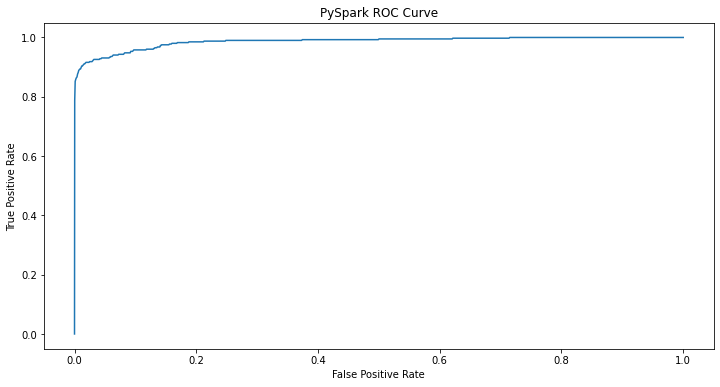

In [58]:
# ROC to Pandas
pyspark_roc = trainingSummary.roc.toPandas()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('PySpark ROC Curve')
plt.plot(pyspark_roc['FPR'],pyspark_roc['TPR'])

The ROC curve for the PySpark logistic regression model shows satisfactory performance. The area (AUC) of ROC curve was 0.986 (ideal AUC score = 1).

Plot the confusion matrix.

Text(0.5, 33.0, 'Predicted')

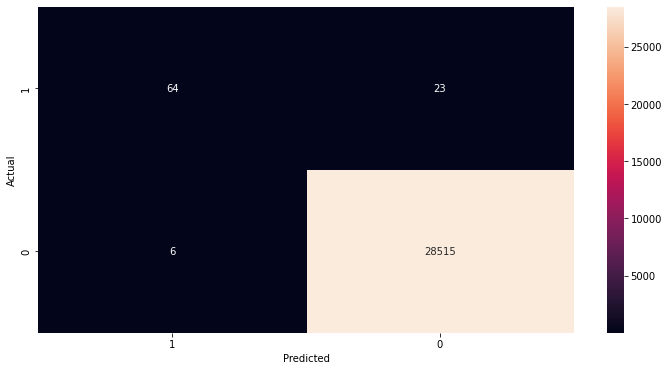

In [59]:
conf_matrix = confusion_matrix(y_true, y_pred)
ax = sns.heatmap(conf_matrix, annot=True,fmt='g')
ax.invert_xaxis()
ax.invert_yaxis()
plt.ylabel('Actual')
plt.xlabel('Predicted')

The accuracy of correctly labeled points for the normal data is relatively high and is satisfactory for the anomalous data. Better metrics using Pyspark Logistric Regression model were obtained, without hyperparameter tuning.

PySpark has an option to weight the data through sample-by-sample basis. This is performed creating a column in the dataframe with each anomaly being weighted a certain amount and each normal point being weighted as 1  (by default everything is weighted as 1). For this reason, PySpark model may have a greater potential in performance than the scikit-learn model.
